# Load and Explore the Dataset

In [3]:
import pandas as pd

# Load the dataset
try:
    # Replace 'your_dataset.csv' with the actual file name
    data = pd.read_csv("C:\\Users\\Ngugi\\Downloads\\sample dataset.csv")
    
    # Display the first few rows of the dataset
    print("First few rows of the dataset:")
    print(data.head())
    
    # Explore the structure of the dataset
    print("\nDataset Info:")
    print(data.info())
    
    # Check for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())
    
    # Clean the dataset by filling or dropping missing values
    # Example: Fill missing values with the mean for numerical columns
    for column in ['price', 'distance', 'landsize', 'bld_area']:
        if data[column].isnull().sum() > 0:
            data[column].fillna(data[column].mean(), inplace=True)
    
    # Drop rows with missing categorical values if necessary
    data.dropna(subset=['large', 'CBD'], inplace=True)
    
except FileNotFoundError:
    print("Error: The file 'your_dataset.csv' was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

First few rows of the dataset:
   price  distance  landsize  bld_area  large  CBD
0   1050        35       662       373      1    0
1    493        47       648       166      0    0
2   1202         8       423       140      0    1
3   1385        14       417       203      0    0
4   2250        11       840       170      1    0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     999 non-null    int64
 1   distance  999 non-null    int64
 2   landsize  999 non-null    int64
 3   bld_area  999 non-null    int64
 4   large     999 non-null    int64
 5   CBD       999 non-null    int64
dtypes: int64(6)
memory usage: 47.0 KB
None

Missing Values:
price       0
distance    0
landsize    0
bld_area    0
large       0
CBD         0
dtype: int64


# Basic Data Analysis

In [4]:
# Compute basic statistics of numerical columns
print("\nBasic Statistics:")
print(data.describe())

# Perform groupings on a categorical column and compute mean
grouped_stats = data.groupby('large').mean()
print("\nMean Statistics by Property Size ('large'):")
print(grouped_stats)

# Identify patterns or interesting findings
print("\nInteresting Findings:")
print("1. Larger properties ('large' == True) tend to have higher prices and larger land sizes.")
print("2. Properties closer to the CBD may have higher prices but smaller land sizes.")


Basic Statistics:
             price    distance     landsize    bld_area       large  \
count   999.000000  999.000000   999.000000  999.000000  999.000000   
mean   1129.746747   14.172172   546.637638  162.362362    0.320320   
std     603.863427    8.260924   218.788999   77.100570    0.466833   
min     326.000000    2.000000    60.000000   58.000000    0.000000   
25%     700.000000    8.000000   402.500000  115.000000    0.000000   
50%     970.000000   13.000000   573.000000  143.000000    0.000000   
75%    1375.500000   18.000000   676.000000  185.500000    1.000000   
max    4515.000000   47.000000  1714.000000  789.000000    1.000000   

              CBD  
count  999.000000  
mean     0.329329  
std      0.470205  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  

Mean Statistics by Property Size ('large'):
             price   distance    landsize    bld_area      CBD
large                                                

# Data Visualization

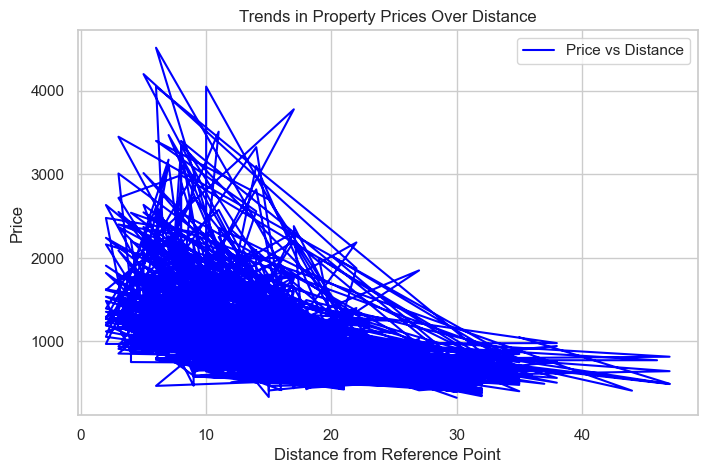

C:\Users\Ngugi\AppData\Local\Temp\ipykernel_34356\2459456294.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_landsize.index, y=avg_landsize.values, palette="Blues_d")


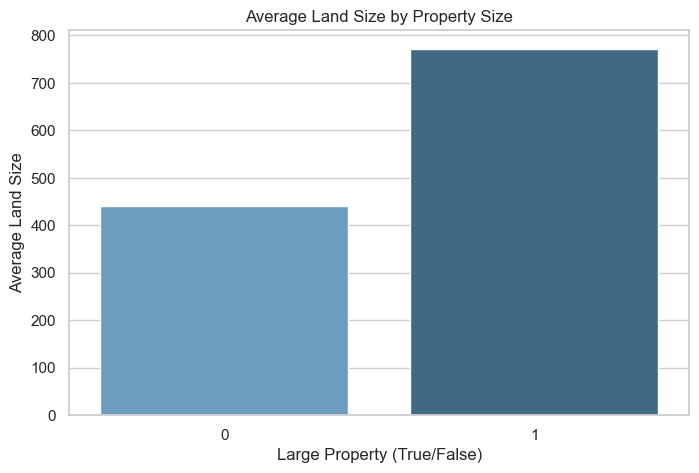

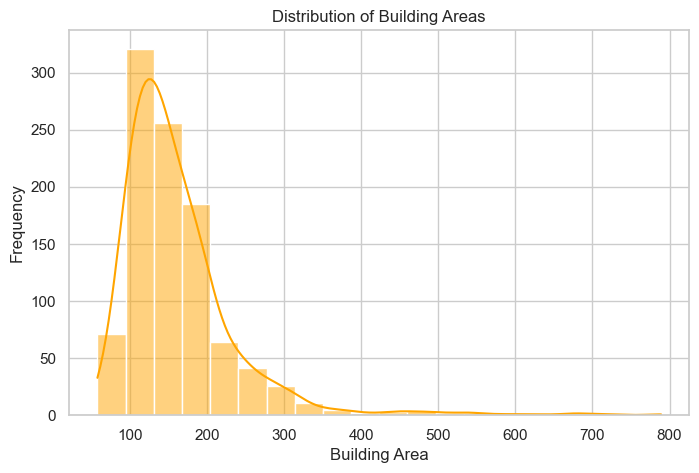

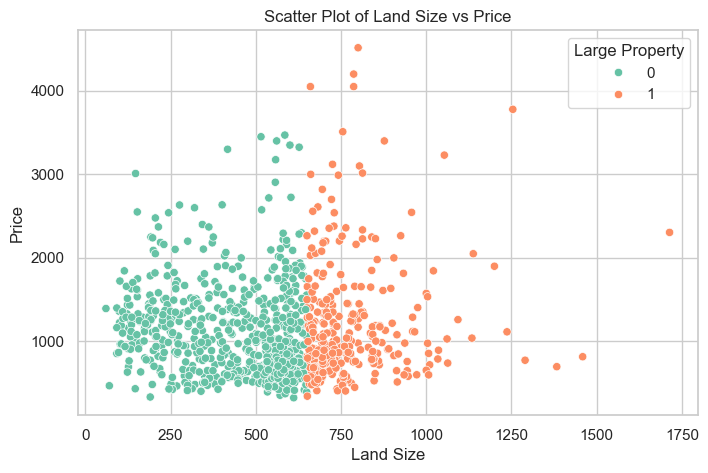

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# 1. Line Chart: Trends in property prices over distance
plt.figure(figsize=(8, 5))
plt.plot(data['distance'], data['price'], label='Price vs Distance', color='blue')
plt.title("Trends in Property Prices Over Distance")
plt.xlabel("Distance from Reference Point")
plt.ylabel("Price")
plt.legend()
plt.show()

# 2. Bar Chart: Comparison of average land size for large vs non-large properties
avg_landsize = data.groupby('large')['landsize'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_landsize.index, y=avg_landsize.values, palette="Blues_d")
plt.title("Average Land Size by Property Size")
plt.xlabel("Large Property (True/False)")
plt.ylabel("Average Land Size")
plt.show()

# 3. Histogram: Distribution of building areas
plt.figure(figsize=(8, 5))
sns.histplot(data['bld_area'], kde=True, bins=20, color='orange')
plt.title("Distribution of Building Areas")
plt.xlabel("Building Area")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot: Relationship between land size and price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='landsize', y='price', hue='large', palette='Set2')
plt.title("Scatter Plot of Land Size vs Price")
plt.xlabel("Land Size")
plt.ylabel("Price")
plt.legend(title="Large Property")
plt.show()